In [20]:
 # The merger rate of the PBH binaries without DM halos assuming that t_merge holds for vaccum only.
# m_j = m_2
# m_i = m_1  and m_2 < equal to m_1.
# Merger Method 1 = Merger of PBH binaries with evaporated DM spikes.

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams
from matplotlib.colors import LogNorm
import matplotlib.colors as colors
import mass_function
import matplotlib.ticker as tkr
from ji_ji_prime_method2 import*
from matplotlib.ticker import LogFormatter 
from scipy.interpolate import InterpolatedUnivariateSpline
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    


PBH_mass_function = np.loadtxt("PBH_mass_function.txt")




π = np.pi
Ω_cdm = 0.85
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1808e3           #in units of M☉ pc^-3 with ρ_eq=2.1548e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.5923e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3



# Merger rate of  PBH binaries without and with halos for PBHs mass range of 5 M☉-100 M☉ .
# As per LIGO/VIRGO/KAGRA limits having merger rates of BBHs in range m_1 = [5, 100] M☉
# and m_2 = [5, 100] M☉, the updated merger rates as per the third run are 
# R_12 = (17.9 - 44) Gpc⁻3 yr⁻1. So, in the calculations of the merger rate 
# we shall be using f_pbh and hence f at R_12 = 44 Gpc⁻3 yr⁻1 so that we don't 
# exceed the upper limit of the merger rate as per 3rd run of LIGO/VIRGO/KAGRA.

X_min = 1e-7
X_max = 1e5



def X_statichalo_by_X_nohalo(m_2, Δ_2):
    if  m_1 < m_min: 
        return 0
    
    elif m_2 < m_min:
        return 0
    
    else:
        def f_(m):
            return f*P(m)

        def f_b(m_1,m_2):
            return  f_(m_1) + f_(m_2)

        def λ(m_1, m_2, Δ_1, Δ_2, X):   #λ_0
            return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))
    
    
        def PDF(m):
            return (P(m)/m)


        I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                             # 0 to infinity.

        n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

        def x̄(m_1,m_2,Δ_1,Δ_2):
            return (((3 * (m_1 + m_2))/(4 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))
        
        beta = 0.75
        gamma  = 0.65
        delta = -0.89   
        m1_ref = 1                   # in units of solar mass.
        m2_ref = 1e-3                # in units of solar mass.

        m = file['arr_0']
        b = file['arr_1']
        a_i_ref = file['arr_2']               # in units of pc
        ji_ref_list = file['arr_3']
        tm_ref_list = file['arr_4']


        def a_initial(m_1, m_2, Δ_1, Δ_2, X):  # for x = x_bar 
            return (0.0977*λ(m_1,m_2,Δ_1,Δ_2, X) + 0.0068*(λ(m_1,m_2,Δ_1,Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))


        def C_ref(m_1,m_2,Δ_1,Δ_2, X):
            return ((a_initial(m_1, m_2, Δ_1, Δ_2, X)/a_i_ref)**(beta)) * ((m_1/ m1_ref)**(gamma)) * ((m_2/m2_ref)**(delta))


        v_list = (C_ref(m_1,m_2,Δ_1,Δ_2, X)/(k(m_1, m_2) * (a_initial(m_1, m_2, Δ_1, Δ_2, X)**4))).tolist()
        j_c = np.zeros(len(v_list))

        for i, v in enumerate(v_list):
            if v < lhs_grid[-1]:  
                j_c[i] = j_c_interp(v)

            else:
                j_c[i] = 1


        def t_c(m_1, m_2, Δ_1, Δ_2, X, j_c): #j_i = j_c such that t_static = t_vaccum.
            return  k(m_1, m_2) * (a_initial(m_1, m_2, Δ_1, Δ_2, X)**4) * (j_c**7)


        t_c_list = t_c(m_1, m_2, Δ_1, Δ_2, X, j_c).tolist()
        a_i_list =  a_initial(m_1, m_2, Δ_1, Δ_2, X).tolist()
        C_ref_list = (C_ref(m_1,m_2,Δ_1,Δ_2, X)).tolist()
        j_initial_list = np.zeros(len(C_ref_list))
        j_initial_prime_list  = np.zeros(len(C_ref_list))


        for i, (C, t_c, a_i) in enumerate(zip(C_ref_list, t_c_list, a_i_list)):
            if t_m <= t_c:
                j_i = (t_c/(k(m_1, m_2)* (a_i**4)))**(1/7)
                j_i_prime = (j_i/(7 * t_c))
            else:
                p, q = ji_ji_prime_static(C)
                j_i = p
                j_i_prime = q


            j_initial_list[i]       =  j_i
            j_initial_prime_list[i] =  j_i_prime


        j_initial = np.array(j_initial_list) 
        j_initial_prime = np.array(j_initial_prime_list)


    return j_initial * ((m_1 + m_2)**(1/37)) * ((f**2 + 1.1994 * (σ_eq**2))**(21/74))/((f**2 + 0.5192 * (σ_eq**2))**(1/2))


X = np.geomspace(X_min, X_max, 1)

In [21]:
bin_centres = np.geomspace(2e-2, 78, 16)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])

ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 

deltas = np.diff(bin_edges)

Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()

m_1 = np.geomspace(2e-2, 78, 16)
m_2 = np.geomspace(2e-2, 78, 16)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   

m_1_list = list(map(lambda x: float(format(x, '.2f')), m_1_list))   
m_2_list = list(map(lambda x: float(format(x, '.2f')), m_2_list)) 
 
m_1_list = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78]  
m_2_list = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78] 


Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)


m_min = 1e-2  #in units of M☉
m_max = 100   #in units of M☉

m_1 = m_1_list[-1]
Δ_1 = Δ_1_list[-1]


m_1 = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78] M☉

Δ_1 = [0.0111651, 0.01937612, 0.03362569, 0.05835466, 0.10126977, 0.17574547, 0.30499199, 0.52928885, 0.91853783, 1.59404786, 2.76634068, 4.80075972, 8.33132886, 14.45834503, 25.09128432, 43.54388745]


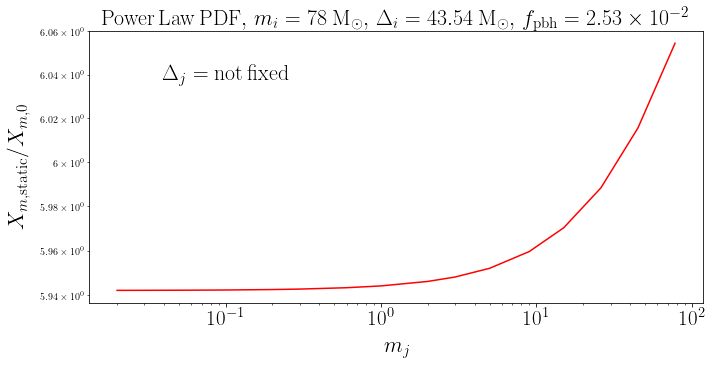

In [23]:
file = np.load('tmofj0_ref_multipeak.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']


f_pbh= 2.53e-2
f = 0.85 * f_pbh
     
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-2    #in units of M☉, for PBHs mass range of 1e-2  M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    

X_ratio_list = np.zeros(len(m_2_list))
for i, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
    X_ratio_list[i] = X_statichalo_by_X_nohalo(m_2, Δ_2)
   
    
    
plt.figure(figsize = (11, 5))    
plt.loglog(m_2_list, X_ratio_list, 'r')

plt.text(0.1, 6.04, "$\Delta_{j} =  \mathrm{not \,fixed}$", size = 22,
       ha="center", va="center") 


plt.xticks(fontsize = 21)
plt.yticks(fontsize = 21)
plt.xlabel('$m_{j}$', fontsize = 22, labelpad = 10)
plt.ylabel('$X_{m, \mathrm{static}}/X_{m, 0}$', fontsize= 22, labelpad = 10)
plt.title(r'$\mathrm{Power\, Law\, PDF}, \, m_{i} = 78 \: \mathrm{M_{\odot}}, \,\Delta_{i} = 43.54\: \mathrm{M_{\odot}}, \, f_\mathrm{pbh} = 2.53\times 10^{-2} $', fontsize = 22)
plt.savefig('X_ratio_static1.pdf', bbox_inches = 'tight')
plt.show()

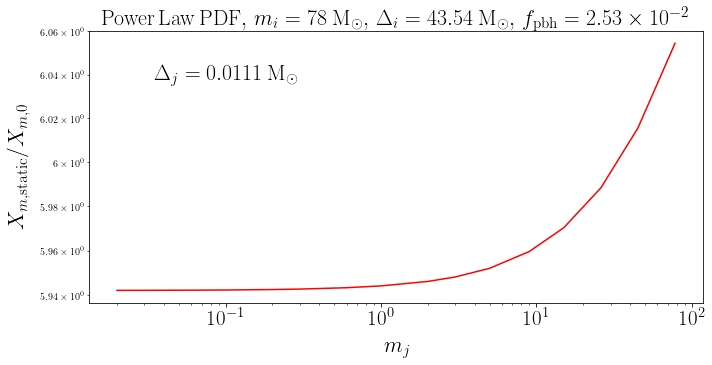

In [25]:
file = np.load('tmofj0_ref_multipeak.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']


f_pbh= 2.53e-2
f = 0.85 * f_pbh
     
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-2    #in units of M☉, for PBHs mass range of 1e-2  M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    

X_ratio_list = np.zeros(len(m_2_list))
for i, m_2 in enumerate(m_2_list):
    Δ_2 = Δ_2_list[0]
    X_ratio_list[i] = X_statichalo_by_X_nohalo(m_2, Δ_2)
   
    
    
plt.figure(figsize = (11, 5))    
plt.loglog(m_2_list, X_ratio_list, 'r')

plt.text(0.1, 6.04, "$\Delta_{j} = 0.0111 \: \mathrm{M_{\odot}}$", size = 22,
       ha="center", va="center") 


plt.xticks(fontsize = 21)
plt.yticks(fontsize = 21)
plt.xlabel('$m_{j}$', fontsize = 22, labelpad = 10)
plt.ylabel('$X_{m, \mathrm{static}}/X_{m, 0}$', fontsize= 22, labelpad = 10)
plt.title(r'$\mathrm{Power\, Law\, PDF},\, m_{i} = 78 \: \mathrm{M_{\odot}}, \,\Delta_{i} = 43.54\: \mathrm{M_{\odot}}, \, f_\mathrm{pbh} = 2.53\times 10^{-2} $', fontsize = 22)
plt.savefig('X_ratio_static2.pdf', bbox_inches = 'tight')
plt.show()

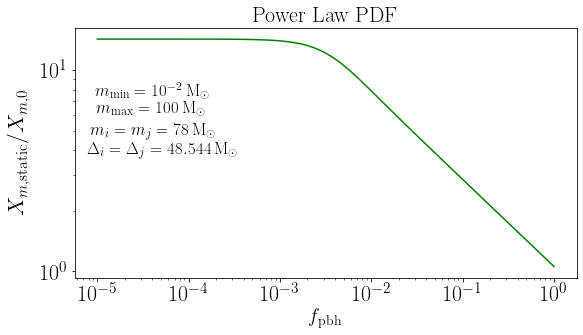

In [45]:
m_1 = m_1_list[6]           # in units of M☉

Δ_1 = Δ_1_list[6]      

m_2 = m_2_list[0]             # in units of M☉
 
Δ_2 = Δ_2_list[0] 


f_pbh = np.geomspace(1e-5, 1, 100)
f_pbh_list = f_pbh.tolist()
f = 0.85 * f_pbh 
f_list = f.tolist()

X_ratio_list = np.zeros(len(f_list))


for i, f in enumerate(f_list):
    X_ratio_list[i] = X_statichalo_by_X_nohalo(m_2, Δ_2)
    

    
plt.figure(figsize = (9, 4.6))
plt.loglog(f_pbh_list, X_ratio_list, 'g')  


plt.text(4e-5, 8, "$m_\mathrm{min} = 10^{-2} \: \mathrm{M_{\odot}}$", size = 17,
         ha="center", va="center")
plt.text(3.8e-5, 6.5, "$m_\mathrm{max} = 100 \: \mathrm{M_{\odot}}$", size = 17,
         ha="center", va="center")

plt.text(4.1e-5, 5, "$m_{i} = m_{j} = 78 \: \mathrm{M_{\odot}}$", size = 17,
       ha="center", va="center")

plt.text(5.2e-5, 4, r"$\Delta_{i} = \Delta_{j} = 48.544\: \mathrm{M_{\odot}}$", size = 17,
         ha="center", va="center")



plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22, color = 'k')
plt.xlabel('$f_\mathrm{pbh}$', fontsize = 20)
plt.ylabel('$X_{m, \mathrm{static}}/X_{m, 0}$', fontsize= 22, labelpad = 10)
plt.title(r'Power Law PDF', fontsize = 22)
plt.savefig('X_ratio_static.pdf', bbox_inches = 'tight')
plt.show()